In [5]:
import pandas as pd
import numpy as np

# 1. Load the datasets
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

# 2. Separate the Target Variable and IDs
# The target variable is 'SalePrice' from the training data.
Y_train = train_data['SalePrice']

# Save the IDs for later submission purposes.
train_IDs = train_data['Id']
test_IDs = test_data['Id']

# 3. Drop the 'Id' and 'SalePrice' columns from the main dataframes
train_data = train_data.drop(['Id', 'SalePrice'], axis=1)
test_data = test_data.drop('Id', axis=1)

# 4. Combine the Train and Test DataFrames
# We concatenate them along the rows (axis=0)
all_data = pd.concat([train_data, test_data], ignore_index=True)

print(f"Combined data shape: {all_data.shape}")
print(all_data.head(5))

Combined data shape: (2919, 79)
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0    

Top 20 Features with Missing Values:
              Missing Count  Missing Percent
PoolQC                 2909            99.66
MiscFeature            2814            96.40
Alley                  2721            93.22
Fence                  2348            80.44
MasVnrType             1766            60.50
FireplaceQu            1420            48.65
LotFrontage             486            16.65
GarageFinish            159             5.45
GarageQual              159             5.45
GarageCond              159             5.45
GarageYrBlt             159             5.45
GarageType              157             5.38
BsmtExposure             82             2.81
BsmtCond                 82             2.81
BsmtQual                 81             2.77
BsmtFinType2             80             2.74
BsmtFinType1             79             2.71
MasVnrArea               23             0.79
MSZoning                  4             0.14
BsmtFullBath              2             0.07


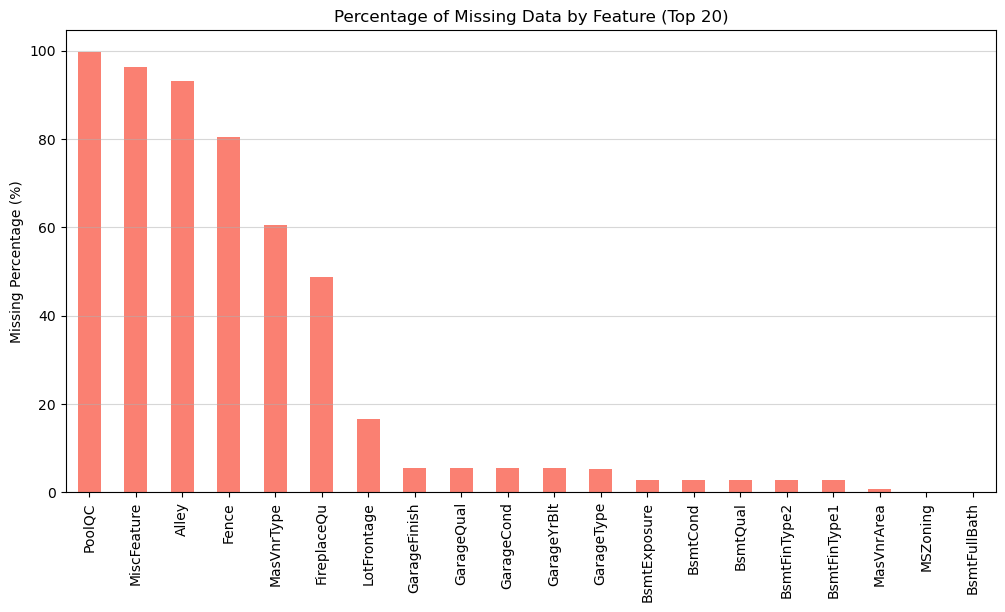

In [7]:
import matplotlib.pyplot as plt
import pandas as pd # You have this already, but it's good practice

# Calculate and sort missing values
missing_counts = all_data.isnull().sum()
missing_data = missing_counts[missing_counts > 0].sort_values(ascending=False)
missing_percentage = (missing_data / all_data.shape[0]) * 100

# Create and print a clean summary table
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percent': missing_percentage.round(2)
})

print("Top 20 Features with Missing Values:")
print(missing_info.head(20))

# Visualize the top missing features
plt.figure(figsize=(12, 6))
missing_percentage.head(20).plot(kind='bar', color='salmon')
plt.title('Percentage of Missing Data by Feature (Top 20)')
plt.ylabel('Missing Percentage (%)')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [9]:
# Impute NaNs with the string 'None' for categorical features where NaN implies absence of the feature.
for col in (
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'MasVnrType', 'MSZoning' # Added MSZoning as a low-count categorical to fill with 'None'
):
    all_data[col] = all_data[col].fillna('None')

print("Step 1: Categorical 'None' imputation complete.")

Step 1: Categorical 'None' imputation complete.


In [10]:
# Impute NaNs with 0 for numerical features where NaN implies absence (zero quantity).
for col in (
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
    'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 
    'MasVnrArea', 'GarageYrBlt'
):
    all_data[col] = all_data[col].fillna(0)

print("Step 2: Numerical '0' imputation complete.")

Step 2: Numerical '0' imputation complete.
